<a href="https://colab.research.google.com/github/umar-ali-k/CNN-Architectures/blob/master/Xception__Net_Architecture_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary packages

In [0]:
from keras import layers
from keras.models import Model

## CNN Xception Net Model

In [29]:
def xception_net(n_classes=1000, opt='sgd'):
  input = layers.Input(shape=(32,32,3))
  x = layers.Conv2D(32, (3, 3), strides = 2, padding = "same", activation = "relu")(input)
  x = layers.BatchNormalization(axis = 3)(x)
  x = layers.Dropout(0.4)(x)
  x = layers.Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu")(x)
  x = layers.BatchNormalization(axis = 3)(x)
  x = layers.Dropout(0.4)(x)


  x1 = layers.DepthwiseConv2D((3, 3), (1, 1), padding = "same", activation = "relu")(x)
  x =  layers.BatchNormalization(axis = 3)(x)
  x =  layers.Dropout(0.4)(x)
  x1 = layers.DepthwiseConv2D((3, 3), (1, 1), padding = "same", activation = "relu")(x1)
  x =  layers.BatchNormalization(axis = 3)(x)
  x =  layers.Dropout(0.4)(x)
  x1 = layers.MaxPooling2D((2, 2), strides = 1)(x1)


  x = layers.concatenate([x1, layers.Conv2D(64, (2, 2), strides = 1)(x)])

  x1 = layers.Activation("relu")(x)
  x1 = layers.Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu")(x1)
  x =  layers.BatchNormalization(axis = 3)(x)
  x =  layers.Dropout(0.4)(x)
  x1 = layers.DepthwiseConv2D((3, 3), strides = 1, padding = "same", activation = "relu")(x1)
  x =  layers.BatchNormalization(axis = 3)(x)
  x =  layers.Dropout(0.4)(x)
  x1 = layers.DepthwiseConv2D((3, 3), strides = 1, padding = "same")(x1)
  x =  layers.BatchNormalization(axis = 3)(x)
  x =  layers.Dropout(0.4)(x)
  x1 = layers.MaxPooling2D((2, 2), strides = 1)(x1)


  x =  layers.concatenate([x1, layers.Conv2D(256, (2, 2), strides = 1)(x)])


  x =  layers.Activation("relu")(x)
  x =  layers.Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu")(x)
  x =  layers.BatchNormalization(axis = 3)(x)
  x =  layers.Dropout(0.4)(x)
  x =  layers.Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu")(x)
  x =  layers.BatchNormalization(axis = 3)(x)
  x =  layers.Dropout(0.4)(x)
  x =  layers.Flatten()(x)


  x =  layers.Dense(100, activation = "softmax")(x)


  xception = Model(input,x)
  xception.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
  
  
  return xception

if __name__ == '__main__':
    xception = xception_net()  
    xception.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 16, 16, 32)   896         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 16, 16, 32)   128         conv2d_39[0][0]                  
__________________________________________________________________________________________________
dropout_48 (Dropout)            (None, 16, 16, 32)   0           batch_normalization_49[0][0]     
____________________________________________________________________________________________

## Plot the model

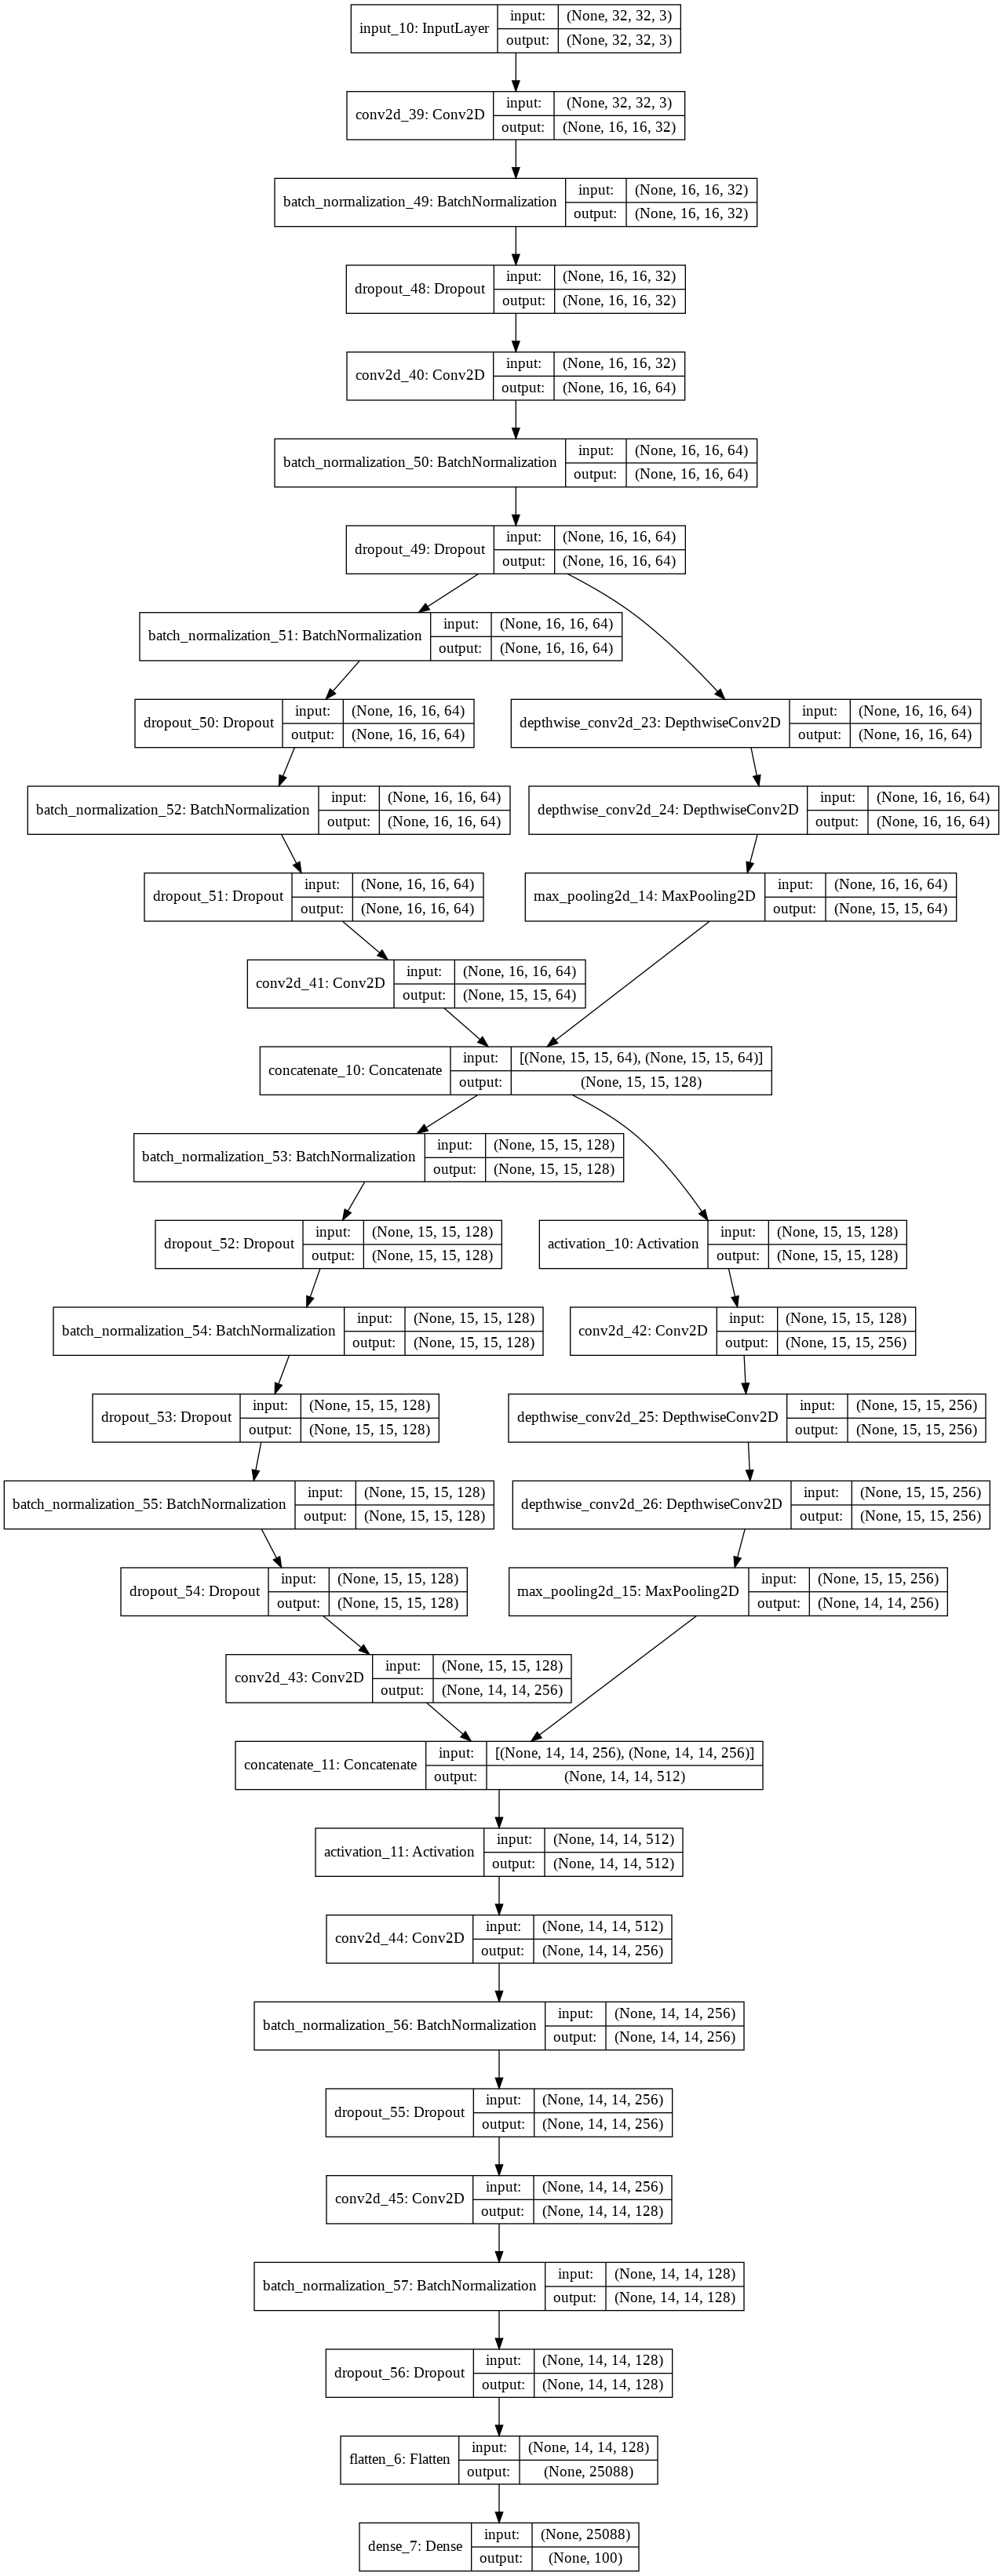

In [31]:
from keras.utils import plot_model
plot_model(xception, to_file='model.png', show_shapes=True, show_layer_names=True)